In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

Data: https://etfdb.com/etf/VGT/#etf-ticker-profile

In [2]:
data = pd.read_csv("../../DATA/VGT_historical data_2005.csv", names=["date", "close", "open", "high", "low", "volume", "change%"], skiprows=1)

In [3]:
data['date']= pd.to_datetime(data['date'])
data['vol_unit'] = data['volume'].str[-1]
data['volume'] = data['volume'].str[:-1]
data['volume'] = pd.to_numeric(data['volume'])
data['volume'] = np.where((data['vol_unit']=="K"),data["volume"]*1000, data["volume"]*1000000)
data.drop("vol_unit", axis = 1, inplace = True)
data['change%'] = data['change%'].str[:-1]
data['change%'] = pd.to_numeric(data['change%'])

In [4]:
data.set_index("date", inplace=True) 

In [5]:
data.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3775 entries, 2019-12-31 to 2005-01-03
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   close    3775 non-null   float64
 1   open     3775 non-null   float64
 2   high     3775 non-null   float64
 3   low      3775 non-null   float64
 4   volume   3775 non-null   float64
 5   change%  3775 non-null   float64
dtypes: float64(6)
memory usage: 206.4 KB


In [6]:
data.describe()

,close,open,high,low,volume,change%
count,3775.000000,3775.000000,3775.000000,3775.000000,3.775000e+03,3775.000000
mean,90.708856,90.718119,91.256114,90.083801,2.718826e+05,0.051934
std,50.820270,50.798378,51.063545,50.508701,3.141218e+05,1.278641
min,29.270000,29.590000,30.410000,28.850000,4.000000e+02,-7.990000
25%,52.565000,52.600000,52.950000,52.100000,9.821000e+04,-0.530000
50%,69.510000,69.520000,70.040000,69.030000,2.074500e+05,0.110000
75%,109.825000,109.880000,110.335000,109.365000,3.514950e+05,0.680000
max,245.730000,246.710000,246.750000,244.930000,6.560000e+06,10.970000


In [7]:
missing_vals = len(pd.date_range(start="2009-01-01", end="2019-12-31", freq="B" ).difference(data.index))
print("Missing Values: ", missing_vals)

Missing Values:  101


In [8]:
data.sort_index(inplace=True)

# Append Variables

In [9]:
import pandas as pd

In [10]:
def append_var_to_data(data, var_name, path):
    df = pd.read_csv("../../DATA/{}.csv".format(path), usecols=["Date", "Price"])
    df.rename({"Price": var_name}, axis=1, inplace=True)
    df['Date']= pd.to_datetime(df['Date'])
    df.set_index("Date", inplace=True) 
    df.sort_index(inplace=True)
    data = data.merge(df, how= "left", left_on=data.index, right_on=df.index, copy=False )
    data.set_index("key_0", inplace=True)
    return data

In [11]:
data = append_var_to_data(data, "copper", "Copper Futures Historical Data")
data = append_var_to_data(data, "gold", "Gold Futures Historical Data")
data = append_var_to_data(data, "gas", "Natural Gas Futures Historical Data")
data = append_var_to_data(data, "oil", "Crude Oil WTI Futures Historical Data")

data = append_var_to_data(data, "s&p500", "S&P 500 Historical Data")
data = append_var_to_data(data, "dow_jones", "Dow Jones 30 Futures Historical Data")

data = append_var_to_data(data, "eur_usd", "EUR_USD Historical Data")
data = append_var_to_data(data, "usd_cny", "USD_CNY Historical Data")

In [12]:
data.head()

,close,open,high,low,volume,change%,copper,gold,gas,oil,s&p500,dow_jones,eur_usd,usd_cny
key_0,,,,,,,,,,,,,,
2005-01-03,46.56,47.46,47.46,46.56,8300.0,-1.06,1.524,428.70,5.790,42.12,NaN,"10,750.00",1.3463,8.2765
2005-01-04,45.60,46.73,46.73,45.54,6400.0,-2.06,1.395,428.50,5.902,43.91,NaN,"10,648.00",1.3272,8.2765
2005-01-05,45.36,45.60,45.60,45.36,1900.0,-0.53,1.422,426.60,5.833,43.39,NaN,"10,587.00",1.3262,8.2765
2005-01-06,45.19,45.56,45.56,45.19,6800.0,-0.37,1.420,421.00,6.049,45.56,NaN,"10,621.00",1.3171,8.2765
2005-01-07,45.22,45.25,45.27,44.95,2900.0,0.07,1.415,418.90,6.001,45.43,NaN,"10,599.00",1.3054,8.2765


In [13]:
data.replace(',','', regex=True, inplace=True)

In [14]:
data=data[data.columns].astype(np.float)

In [15]:
data.head()

,close,open,high,low,volume,change%,copper,gold,gas,oil,s&p500,dow_jones,eur_usd,usd_cny
key_0,,,,,,,,,,,,,,
2005-01-03,46.56,47.46,47.46,46.56,8300.0,-1.06,1.524,428.7,5.790,42.12,NaN,10750.0,1.3463,8.2765
2005-01-04,45.60,46.73,46.73,45.54,6400.0,-2.06,1.395,428.5,5.902,43.91,NaN,10648.0,1.3272,8.2765
2005-01-05,45.36,45.60,45.60,45.36,1900.0,-0.53,1.422,426.6,5.833,43.39,NaN,10587.0,1.3262,8.2765
2005-01-06,45.19,45.56,45.56,45.19,6800.0,-0.37,1.420,421.0,6.049,45.56,NaN,10621.0,1.3171,8.2765
2005-01-07,45.22,45.25,45.27,44.95,2900.0,0.07,1.415,418.9,6.001,45.43,NaN,10599.0,1.3054,8.2765


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3775 entries, 2005-01-03 to 2019-12-31
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   close      3775 non-null   float64
 1   open       3775 non-null   float64
 2   high       3775 non-null   float64
 3   low        3775 non-null   float64
 4   volume     3775 non-null   float64
 5   change%    3775 non-null   float64
 6   copper     3774 non-null   float64
 7   gold       3774 non-null   float64
 8   gas        3773 non-null   float64
 9   oil        3772 non-null   float64
 10  s&p500     3521 non-null   float64
 11  dow_jones  3774 non-null   float64
 12  eur_usd    3775 non-null   float64
 13  usd_cny    3775 non-null   float64
dtypes: float64(14)
memory usage: 442.4 KB


# Create Features

In [17]:
from technical_indicators_elisa import *

In [18]:
indicators = TechnicalIndicator(data)
indicators.create_features()

In [19]:
data = indicators.df
data

,close,open,high,low,volume,change%,copper,gold,gas,oil,...,cci_10,cci_15,cci_20,cci_25,cci_30,cmo_10,cmo_15,cmo_20,cmo_25,cmo_30
key_0,,,,,,,,,,,,,,,,,,,,,
2005-01-03,46.56,47.46,47.46,46.56,8300.0,-1.06,1.5240,428.7,5.790,42.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,45.60,46.73,46.73,45.54,6400.0,-2.06,1.3950,428.5,5.902,43.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,45.36,45.60,45.60,45.36,1900.0,-0.53,1.4220,426.6,5.833,43.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06,45.19,45.56,45.56,45.19,6800.0,-0.37,1.4200,421.0,6.049,45.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07,45.22,45.25,45.27,44.95,2900.0,0.07,1.4150,418.9,6.001,45.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,243.85,244.10,244.24,243.27,234600.0,0.01,2.8640,1547.3,2.172,61.11,...,107.247308,103.717173,127.772457,148.599714,164.772042,91.764,78.480,34.186,31.978,38.171
2019-12-26,245.73,244.32,245.73,244.32,301470.0,0.77,2.8870,1557.1,2.294,61.68,...,131.121855,120.382006,135.238569,156.508574,174.402338,92.007,79.829,38.615,34.330,40.138
2019-12-27,245.64,246.71,246.75,244.93,349470.0,-0.04,2.8675,1561.2,2.158,61.72,...,121.308955,120.890071,126.316500,146.686395,165.173901,88.185,78.118,34.470,39.276,38.914


In [20]:
data.to_csv("../../DATA/VGT_preprocessed.csv")

# EDA

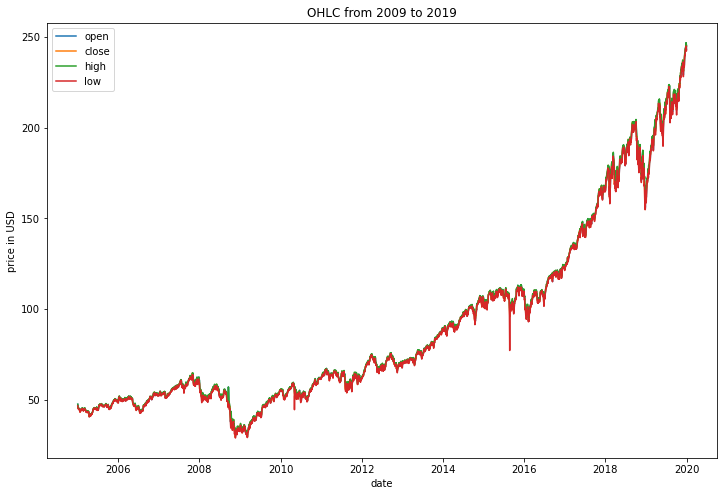

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(data.index, data[["open", "close", "high", "low"]])
plt.legend(["open", "close", "high", "low"])
plt.xlabel("date")
plt.ylabel("price in USD")
plt.title("OHLC from 2009 to 2019")
plt.show()

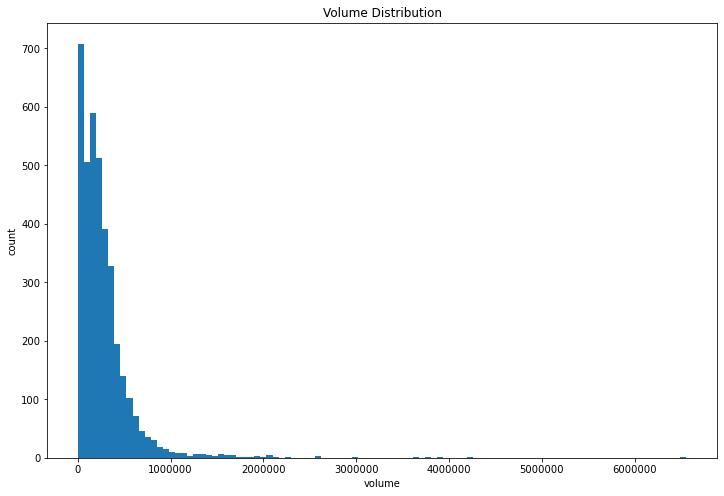

In [22]:
plt.figure(figsize=(12, 8))
plt.hist(data.volume, bins = 100)
plt.title("Volume Distribution")
plt.xlabel("volume")
plt.ylabel("count")
plt.ticklabel_format(style='plain')
plt.show()

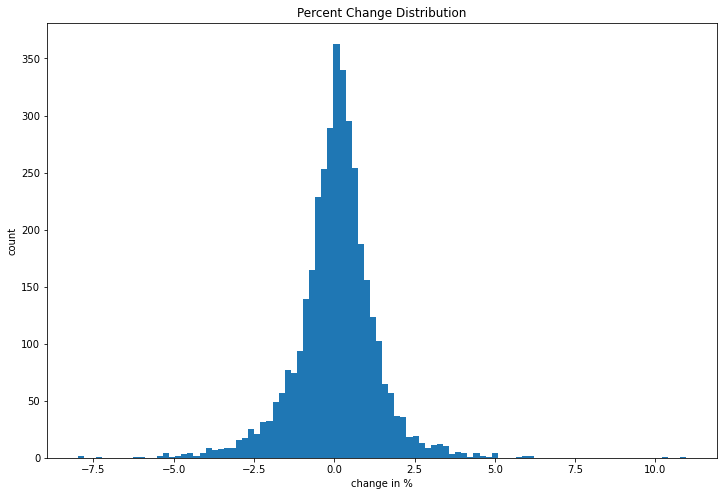

In [23]:
plt.figure(figsize=(12, 8))
plt.hist(data["change%"], bins = 100)
plt.title("Percent Change Distribution")
plt.xlabel("change in %")
plt.ylabel("count")
plt.ticklabel_format(style='plain')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

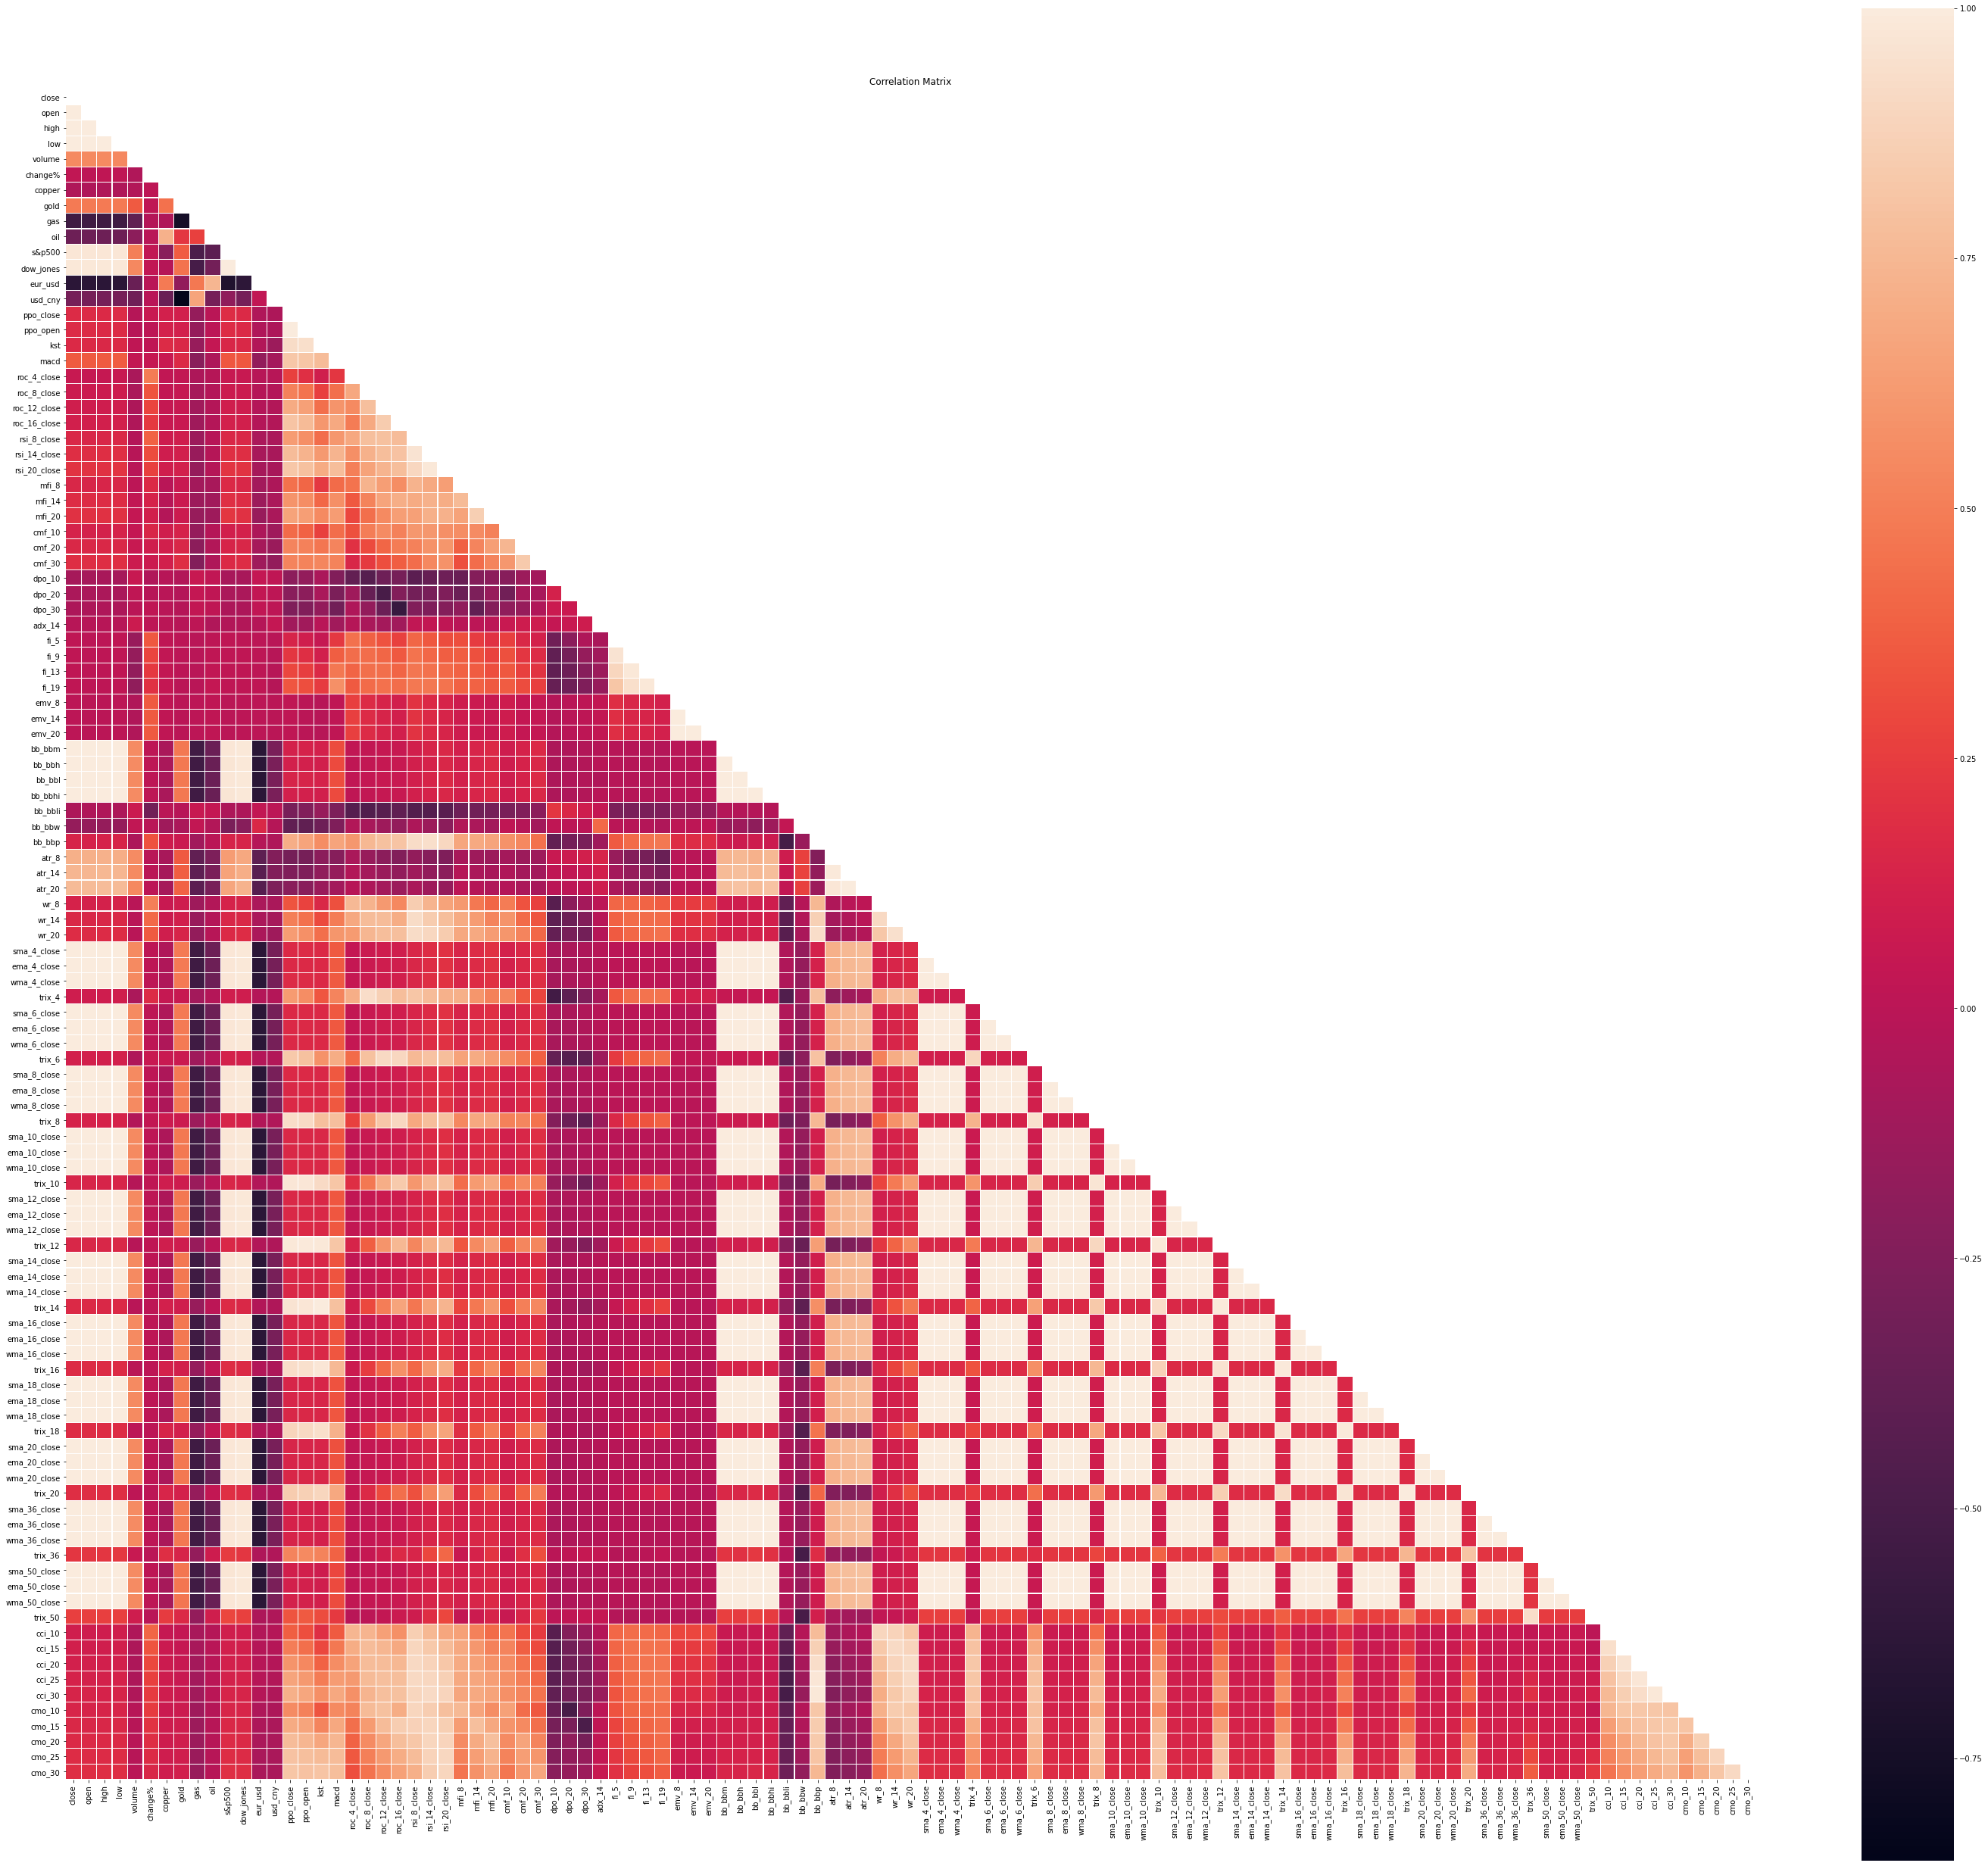

In [24]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50, 45))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, annot=False,square=True, linewidths=.1).set_title('Correlation Matrix')

# Create Labels

In [25]:
data.sort_index(inplace=True)

In [26]:
def create_labels(data=data):
    y_labels = [0.]# first data point
    y_value_diffs = [data.open.iloc[0]]
    
    y = [1. if data.open.iloc[i]>data.close.iloc[(i-1)] else 0. for i in range(1, len(data))]
    value_diff = [(data.open.iloc[i]-data.close.iloc[(i-1)]) for i in range(1, len(data))]
    
    y_labels.extend(y)
    y_value_diffs.extend(value_diff)
    
    return np.array(y_labels), np.array(y_value_diffs)

In [27]:
Y, value_diffs = create_labels()
Y.mean()

0.5737748344370861

In [28]:
wins = np.array([(data.open.iloc[i]-data.close.iloc[(i-1)]) for i in range(1, len(data)) if data.open.iloc[i]>=data.close.iloc[(i-1)]])
print("Mean Win:", wins.mean())
print("Total Wins: ", len(wins))

Mean Win: 0.4041963079693833
Total Wins:  2221


In [29]:
losses = np.array([data.open.iloc[i]-data.close.iloc[(i-1)] for i in range(1, len(data)) if data.open.iloc[i]<data.close.iloc[(i-1)]])
print("Mean Loss:", losses.mean())
print("Total Loss: ", len(losses))

Mean Loss: -0.4284352865421764
Total Loss:  1553


# Train Test Split

In [30]:
data[data.isna().any(axis=1)]

,close,open,high,low,volume,change%,copper,gold,gas,oil,...,cci_10,cci_15,cci_20,cci_25,cci_30,cmo_10,cmo_15,cmo_20,cmo_25,cmo_30
key_0,,,,,,,,,,,,,,,,,,,,,
2005-01-03,46.56,47.46,47.46,46.56,8300.0,-1.06,1.524,428.7,5.790,42.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,45.60,46.73,46.73,45.54,6400.0,-2.06,1.395,428.5,5.902,43.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,45.36,45.60,45.60,45.36,1900.0,-0.53,1.422,426.6,5.833,43.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06,45.19,45.56,45.56,45.19,6800.0,-0.37,1.420,421.0,6.049,45.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07,45.22,45.25,45.27,44.95,2900.0,0.07,1.415,418.9,6.001,45.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-12-30,48.38,48.40,48.40,48.22,18300.0,-0.51,2.162,517.1,11.225,61.04,...,-198.735527,-194.285935,-193.244616,-224.465985,-205.342688,-57.143,-40.260,-49.618,-25.138,1.302
2006-01-03,49.28,48.64,49.43,48.10,99200.0,1.86,2.168,530.7,10.626,63.14,...,44.091711,-17.483378,-40.481802,-53.702101,-49.971926,-13.514,-16.442,-22.500,-9.120,4.881
2006-07-03,46.72,46.02,46.72,46.02,35400.0,1.06,3.462,613.5,6.104,NaN,...,125.219298,144.877625,139.216128,63.277476,38.511868,29.792,32.653,2.362,-7.500,-4.360


In [31]:
data.dropna(inplace=True) # delete all rows with null values (as some indicators cant be calculated for the first days)

In [32]:
train_size = int(0.8*len(data))
test_size = len(data) - train_size

In [33]:
X_train, y_train = data[:train_size], Y[:train_size]
X_test, y_test = data[train_size:], Y[train_size:]
value_diff_train, value_diff_test =  value_diffs[:train_size], value_diffs[:train_size]

# Feature Selection

## 1. Feature Importance

### 1.1 F-Test

p high: low probability of causality (remove)

p small: high probability of causality (keep)

### 1.1.1 F-test for 1 Day

In [34]:
# manually --> can set threshold (e.g. 0.5)
from sklearn.feature_selection import f_classif

f_scores, p_scores = f_classif(X_train, y_train)
feature_importance = pd.DataFrame({"p_scores":p_scores, "f_scores":f_scores}, index=X_train.columns)
feature_importance.sort_values("p_scores",ascending=True).head(20)

,p_scores,f_scores
fi_5,0.013556,6.102734
fi_9,0.019488,5.463462
fi_13,0.029612,4.736502
fi_19,0.051434,3.797312
trix_50,0.067074,3.355798
emv_20,0.128741,2.308982
emv_14,0.128741,2.308982
emv_8,0.128741,2.308982
eur_usd,0.153372,2.039489
trix_36,0.216742,1.526498


In [35]:
from sklearn.feature_selection import SelectKBest
k = 20
select_k_best = SelectKBest(f_classif, k=k)
X_transformed=select_k_best.fit_transform(X_train, y_train)
cols=select_k_best.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
features_df_new.head()

,change%,s&p500,eur_usd,mfi_14,cmf_10,dpo_20,dpo_30,adx_14,fi_5,fi_9,fi_13,fi_19,emv_8,emv_14,emv_20,atr_8,atr_14,atr_20,trix_36,trix_50
key_0,,,,,,,,,,,,,,,,,,,,
2006-01-04,1.32,1273.46,1.2128,65.624484,0.220928,0.2800,0.348667,20.564051,25733.884329,17071.344165,12866.779395,9810.682817,1009.536785,1009.536785,1009.536785,0.574180,0.528320,0.509789,0.103918,0.078102
2006-01-05,0.92,1273.48,1.2102,69.883273,0.291497,-0.3780,0.365000,20.713321,22077.922886,16610.275332,13138.096625,10306.214536,508.878505,508.878505,508.878505,0.561158,0.524154,0.507800,0.103333,0.078631
2006-01-06,1.59,1285.45,1.2149,74.437012,0.366530,-0.5710,0.357333,21.800386,28958.615257,21832.220266,17364.082821,13547.593082,871.722846,871.722846,871.722846,0.598513,0.548143,0.525410,0.103209,0.079308
2006-01-09,0.43,1290.15,1.2087,77.495465,0.302470,-0.5205,0.202000,23.081334,26199.076838,21601.776213,17837.785275,14260.833774,204.255319,204.255319,204.255319,0.583699,0.543276,0.523139,0.103532,0.080137
2006-01-10,0.19,1289.69,1.2067,81.662060,0.495939,-0.3415,0.066667,24.205243,19072.717892,18245.420970,15978.101664,13316.750396,-29.875519,-29.875519,-29.875519,0.570737,0.538756,0.520982,0.104245,0.081103


### 1.1.2 F-Test for Pictures with Several Days

In [36]:
def create_row_for_each_picture(days=10 , sliding_window=5, data=X_train, y_labels=y_train, y_value_diff=value_diff_train):
    images = np.arange(0,len(data)-days, sliding_window) #starting date of each image 
    
    # create column names for each day for each varibale 
    indicator_per_day = []
    for indicator in data.columns:
        for day in range(days): # 10 days
            i = indicator + "_day" + str(day)
            indicator_per_day.append(i)    
    
    # create row with all historical data for each picture (e.g. one row contains last 15 closing prices, opening prices, etc.)
    # create label
    df = pd.DataFrame()
    index = []
    labels = []
    value_diffs = []
    
    for image in images: 
        variables = []
        for var in data.columns:
            variables.extend(data[var].iloc[image:image+days])
        index.append(data.index[image+days])
        labels.append(y_labels[image+days])
        value_diffs.append(y_value_diff[image+days])

        df = df.append([variables])
    df.columns=indicator_per_day
    df.index=index 
    
    return df,labels, value_diffs

In [37]:
image_data_train, y_train_img, value_diff_img_train = create_row_for_each_picture(data=X_train, y_labels=y_train)
image_data_train.head()

,close_day0,close_day1,close_day2,close_day3,close_day4,close_day5,close_day6,close_day7,close_day8,close_day9,...,cmo_30_day0,cmo_30_day1,cmo_30_day2,cmo_30_day3,cmo_30_day4,cmo_30_day5,cmo_30_day6,cmo_30_day7,cmo_30_day8,cmo_30_day9
2006-01-19,49.93,50.39,51.19,51.41,51.51,51.99,51.64,51.48,51.08,50.55,...,11.198,16.113,20.234,19.575,19.575,28.028,24.161,23.333,8.876,2.123
2006-01-26,51.99,51.64,51.48,51.08,50.55,50.97,49.42,49.42,49.74,49.82,...,28.028,24.161,23.333,8.876,2.123,10.889,-5.804,-4.899,1.152,-0.684
2006-02-02,50.97,49.42,49.42,49.74,49.82,50.05,50.55,50.74,50.33,50.59,...,10.889,-5.804,-4.899,1.152,-0.684,0.962,5.069,7.678,4.525,7.517
2006-02-09,50.05,50.55,50.74,50.33,50.59,49.92,49.27,49.25,49.15,49.89,...,0.962,5.069,7.678,4.525,7.517,7.236,2.585,1.264,-1.793,3.948
2006-02-16,49.92,49.27,49.25,49.15,49.89,49.70,49.83,49.27,49.84,49.99,...,7.236,2.585,1.264,-1.793,3.948,6.173,6.404,5.195,11.551,5.971


In [38]:
from sklearn.feature_selection import f_classif
    
def feature_importance_ftest(days=10, X_data=image_data_train, y_data=y_train_img, features=data.columns):
    """
    Returns avergae p and f value for each feature.
    """
    
    f_scores, p_scores = f_classif(X_data, y_data)
    scores = pd.DataFrame(index=features, columns=["p_score", "f_score"])

    for var in features:
        scores.loc[var] = {"p_score":np.mean(p_scores[:days]), "f_score":np.mean(f_scores[:days])}
        f_scores = f_scores[days:]
        p_scores = p_scores[days:]
    
    return scores

In [39]:
feature_importance_ftest().sort_values("p_score", ascending=True).head(20)

,p_score,f_score
trix_50,0.075487,3.187422
trix_36,0.166284,1.968055
eur_usd,0.180378,1.81184
trix_4,0.212908,1.608327
roc_8_close,0.262323,1.52079
s&p500,0.263813,1.257396
trix_6,0.295476,1.362122
dow_jones,0.302576,1.074176
low,0.307738,1.044013
close,0.313111,1.02041


### 1.2 Feature Importance with Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

image_data_train, y_train_img, value_diff_img_train = create_row_for_each_picture(data=X_train, y_labels=y_train,days=10, sliding_window=2)

reg = LogisticRegression()
reg.fit(image_data_train, y_train_img)

LogisticRegression()

In [41]:
def feature_importance_reg(days=10, fitted_reg_object=reg, features=data.columns):
    
    coefs=np.abs(fitted_reg_object.coef_[0])
    scores = pd.DataFrame(index=features, columns=["coef_avg","coefs"])

    for var in features:
        scores.loc[var] = {"coef_avg":np.mean(coefs[:days]), "coefs":coefs[:days]}
        coefs = coefs[days:]    
    return scores

In [42]:
feature_importance_reg().sort_values("coef_avg", ascending=False).head(20)

,coef_avg,coefs
emv_14,0.000012,"[9.192818252651941e-06, 1.4793605682137322e-05..."
emv_8,0.000012,"[9.192818252651941e-06, 1.4793605682137322e-05..."
emv_20,0.000012,"[9.192818252651941e-06, 1.4793605682137322e-05..."
gold,0.000004,"[3.880418104935717e-06, 4.206354032215977e-06,..."
fi_13,0.000003,"[5.768394294731713e-06, 4.6809569545155755e-06..."
fi_9,0.000002,"[4.06688725058416e-06, 3.6222432178236233e-06,..."
fi_19,0.000001,"[1.268476546503465e-06, 1.3259956005305567e-06..."
cci_10,0.000001,"[1.6039669993470477e-06, 1.5320932828053916e-0..."
s&p500,0.000001,"[1.013457076531197e-06, 9.27234501826059e-07, ..."
dow_jones,0.000001,"[9.44252045803716e-07, 9.148285077631444e-07, ..."


### 1.3 Feature Importance with Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(image_data_train, value_diff_img_train)

linreg_importance = feature_importance_reg().sort_values("coef_avg", ascending=False)
linreg_importance.head(20)

,coef_avg,coefs
emv_14,0.000012,"[9.192818252651941e-06, 1.4793605682137322e-05..."
emv_8,0.000012,"[9.192818252651941e-06, 1.4793605682137322e-05..."
emv_20,0.000012,"[9.192818252651941e-06, 1.4793605682137322e-05..."
gold,0.000004,"[3.880418104935717e-06, 4.206354032215977e-06,..."
fi_13,0.000003,"[5.768394294731713e-06, 4.6809569545155755e-06..."
fi_9,0.000002,"[4.06688725058416e-06, 3.6222432178236233e-06,..."
fi_19,0.000001,"[1.268476546503465e-06, 1.3259956005305567e-06..."
cci_10,0.000001,"[1.6039669993470477e-06, 1.5320932828053916e-0..."
s&p500,0.000001,"[1.013457076531197e-06, 9.27234501826059e-07, ..."
dow_jones,0.000001,"[9.44252045803716e-07, 9.148285077631444e-07, ..."


## 2. Correlation / Collinearity

### 2.1 Correlation

In [44]:
linreg_importance_variables=linreg_importance.index[:30] # used a subset to make the matrix smaller

Text(0.5, 1.0, 'Correlation Matrix')

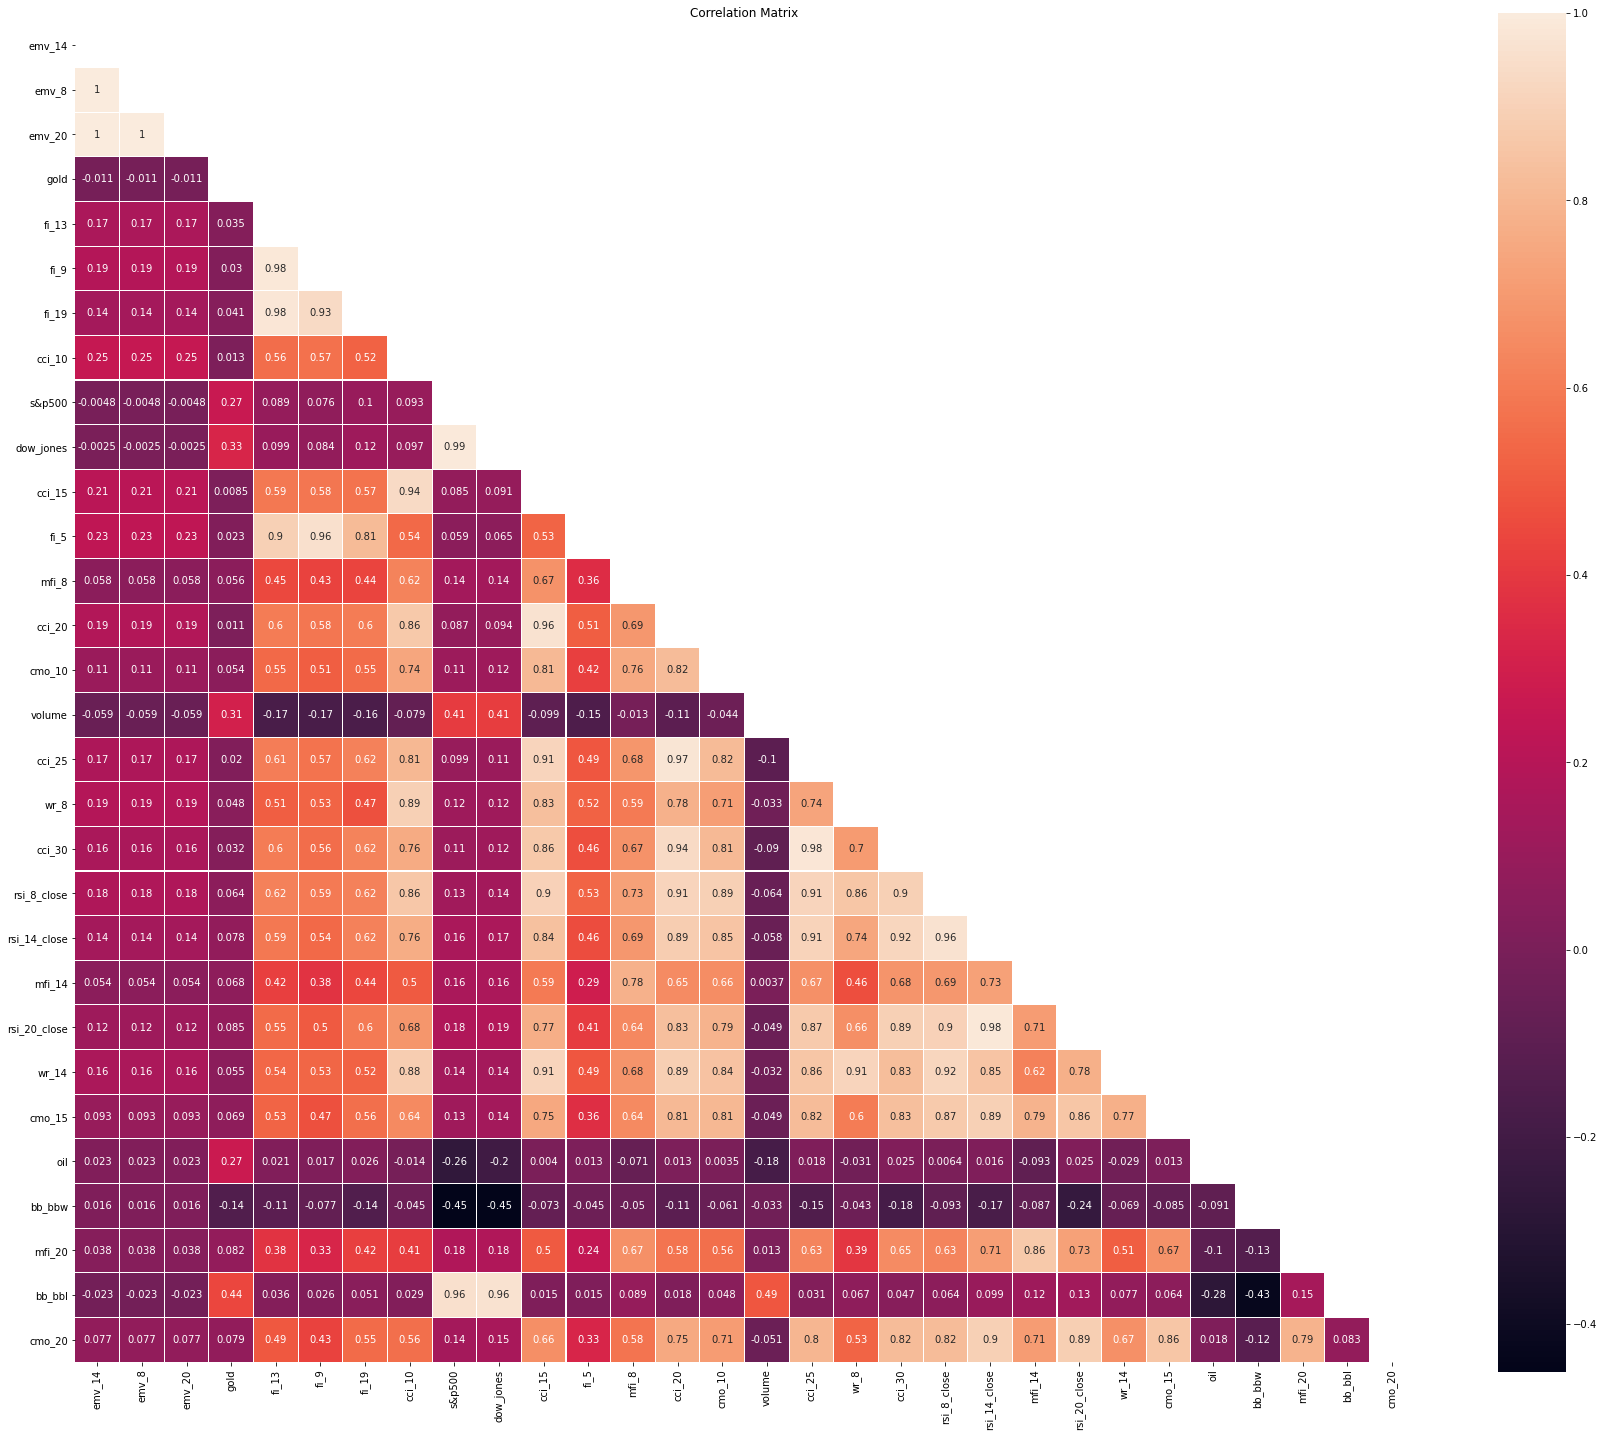

In [45]:
# Compute the correlation matrix
corr = X_train[linreg_importance_variables].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, annot=True, square=True, linewidths=0.1).set_title('Correlation Matrix')

## 2.2 Multicollinearity using hierachical clustering 
(Hierarchical clustering on the Spearman rank-order correlations, picking a threshold, and keeping a single feature from each cluster)

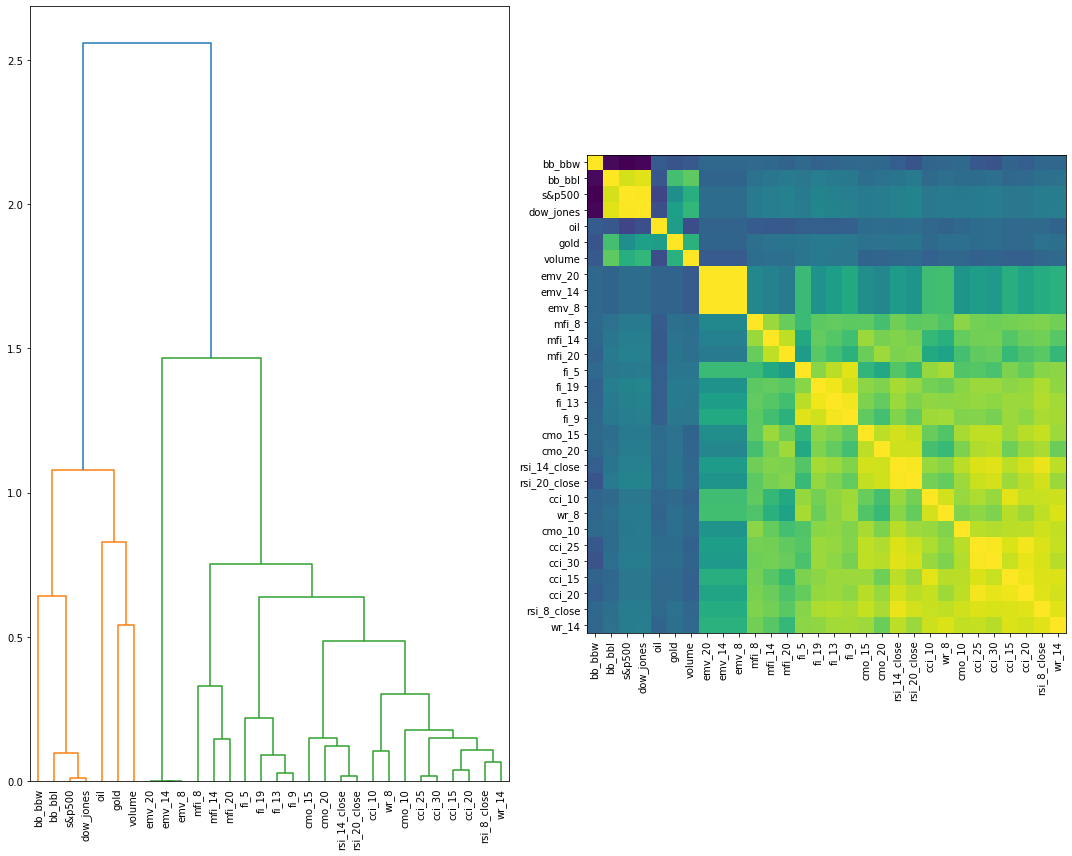

In [47]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# used a subset to make the matrix smaller (from linreg results)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 12))
corr = spearmanr(X_train[linreg_importance_variables]).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T)/2
np.fill_diagonal(corr, 1)

# convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(dist_linkage, labels=linreg_importance_variables, ax=ax1, leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [48]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 0.5, criterion='distance') # set threshold (the lower, the more features included)
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

In [49]:
selected_features

[0, 3, 4, 7, 8, 12, 15, 25, 26]

### 2.3 Multicolliniarity using VIF

--> Best method for treating correlated variables in my opinion 

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin
from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=10):
        self.thresh = thresh

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [51]:
Mult_Coll = ReduceVIF(thresh=20) # threshold of 5 and 10 commonly used
Data3 = Mult_Coll.fit_transform(X_train)
Data3.head()

ReduceVIF transform
Dropping ema_10_close with vif=inf
Dropping emv_8 with vif=inf
Dropping sma_8_close with vif=inf
Dropping dpo_20 with vif=inf
Dropping bb_bbm with vif=inf
Dropping bb_bbhi with vif=inf
Dropping emv_14 with vif=inf
Dropping bb_bbl with vif=inf
Dropping ema_6_close with vif=inf
Dropping ema_12_close with vif=inf
Dropping ema_16_close with vif=inf
Dropping ema_18_close with vif=264917625139440.94
Dropping ema_14_close with vif=3362149777805.5215
Dropping ema_8_close with vif=682415278031.7443
Dropping wma_18_close with vif=255632162756.94598
Dropping trix_16 with vif=34191483463.565796
Dropping wma_16_close with vif=2497982897.7072678
Dropping ema_36_close with vif=2308605948.813234
Dropping wma_14_close with vif=1891545910.2374518
Dropping wma_20_close with vif=1156058733.561758
Dropping ema_20_close with vif=891641852.2834457
Dropping wma_8_close with vif=708255690.9834834
Dropping wma_12_close with vif=449143457.68191814
Dropping trix_12 with vif=332448076.7505491
D

,low,volume,change%,gas,oil,kst,roc_4_close,roc_8_close,roc_12_close,mfi_8,...,wr_8,trix_50,cci_10,cci_15,cci_30,cmo_10,cmo_15,cmo_20,cmo_25,cmo_30
key_0,,,,,,,,,,,,,,,,,,,,,
2006-01-04,49.55,36700.0,1.32,10.197,63.42,5.261879,1.794088,1.690428,0.220795,74.503576,...,-0.000000,0.078102,158.841941,89.275091,39.663323,25.150,-0.465,-1.181,5.598,11.198
2006-01-05,50.07,32100.0,0.92,9.499,62.79,4.897839,3.619165,2.086710,1.327167,70.394056,...,-0.434783,0.078631,194.817658,163.309181,114.522417,38.965,8.280,6.545,13.019,16.113
2006-01-06,50.55,53400.0,1.59,9.632,64.21,5.848984,5.808185,3.623482,4.277857,66.792708,...,-1.904762,0.079308,194.672934,236.458333,230.711288,48.268,23.845,20.323,23.537,20.234
2006-01-09,51.06,94000.0,0.43,9.360,63.50,7.796477,4.322240,5.025536,5.004085,83.578613,...,-3.779070,0.080137,145.797842,199.514327,238.591622,47.786,28.649,29.296,15.517,19.575
2006-01-10,51.03,48200.0,0.19,9.336,63.37,10.175984,3.164430,5.015291,4.908350,89.592002,...,-0.872093,0.081103,108.302566,152.726559,209.951350,48.506,32.014,27.273,16.358,19.575


# Normalization 

In [52]:
scaler = MinMaxScaler(feature_range=(-1, 1))
column_names = data.columns
X_train_norm = scaler.fit_transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=column_names)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=column_names)

# Create GAF
Note: GAF without Feature Selection

In [53]:
gasf = GramianAngularField(image_size=1.0, sample_range=(0,1), method='summation')
X_gasf_train = gasf.fit_transform(X_train_norm)
X_gasf_test = gasf.transform(X_test_norm)

gadf = GramianAngularField(image_size=1.0, sample_range=(0,1), method='difference')
X_gadf_train = gadf.fit_transform(X_train_norm)
X_gadf_test = gadf.fit_transform(X_test_norm)

In [54]:
X_gasf_train.shape # datapoints, features, features 

(2815, 109, 109)

In [55]:
X_gasf_test.shape

(704, 109, 109)

In [56]:
# plot GAFS
def plot_gaf(datapoint=0, X_gasf=X_gasf_train, X_gadf=X_gadf_train, Y=y_train):
    fig = plt.figure(figsize=(8, 4))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 2),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.3,
                     )
    images = [X_gasf[datapoint], X_gadf[datapoint]]
    titles = ['Summation', 'Difference']
    for image, title, ax in zip(images, titles, grid):
        im = ax.imshow(image, cmap='rainbow', origin='lower')
        ax.set_title(title, fontdict={'fontsize': 12})
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
    plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
    plt.show()
    print("                          ",Y[datapoint])

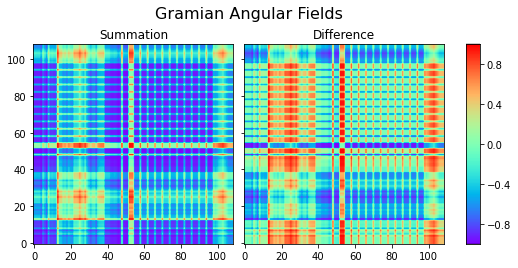

                           1.0


In [57]:
plot_gaf(X_gasf=X_gasf_train, X_gadf=X_gadf_train, Y=y_train, datapoint=5) # win

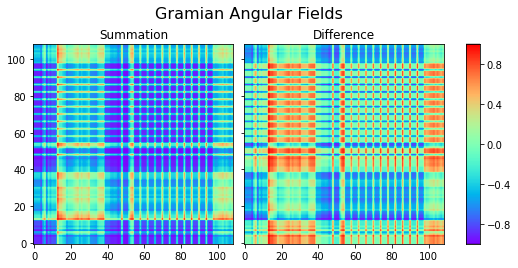

                           0.0


In [60]:
plot_gaf(X_gasf=X_gasf_train, X_gadf=X_gadf_train, Y=y_train, datapoint=201) # loss